# Cálculos iniciales de carteras

En este caso vamos a trabajar con una cartera de tres activos, y exploraremos cómo calcular la correlación entre ellos, así como la rentabilidad y riesgo de la cartera.

Descarga de datos.

In [2]:
import yfinance as yf

data = yf.download(["AAPL", "GLD", "MSFT", "SPY"], start="2018-12-31", end="2023-12-31")
data = data.loc[:, "Adj Close"]

[*********************100%%**********************]  4 of 4 completed


1. Cálculo de la rentabilidad media de los retornos:

$$\bar{r} = \frac{1}{n} \sum_{i=1}^n r_i$$

2. Cálculo de la varianza de los retornos:

$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2$$

3. Cálculo de la desviación típica de los retornos:

$$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2}$$

La rentabilidad, varianza y desviación típica **siempre se expresa en términos anuales**:

- Si los datos son diarios, consideramos que hay 252 días al año de negociación.
- Si los datos son semanales, consideramos que hay 52 semanas al año.
- Si los datos son mensuales, consideramos que hay 12 meses al año.

<span style="color:orange">TODO: Gonzalo, como ejercicio, implementar estas fórmulas sin usar pandas.</span>

<span style="color:orange">TODO: Gonzalo, como ejercicio, implementar un producto matricial a mano.</span>

Calculamos la rentabilidad logarítmica para **un activo**.

In [19]:
import numpy as np

rentabilidad_log = np.log(data.loc[:, "AAPL"]).diff().dropna()
rentabilidad_log

Date
2019-01-02    0.001140
2019-01-03   -0.104924
2019-01-04    0.041803
2019-01-07   -0.002228
2019-01-08    0.018884
                ...   
2023-12-22   -0.005563
2023-12-26   -0.002845
2023-12-27    0.000518
2023-12-28    0.002224
2023-12-29   -0.005439
Name: AAPL, Length: 1258, dtype: float64

In [20]:
print(f'Rentabilidad media anualizada: {rentabilidad_log.mean() * 252:.4f}')
print(f'Varianza anualizada: {rentabilidad_log.var() * 252:.4f}')
print(f'Desviación estándar anualizada: {rentabilidad_log.std() * np.sqrt(252):.4f}')

Rentabilidad media anualizada: 0.3258
Varianza anualizada: 0.1039
Desviación estándar anualizada: 0.3224


¿Cómo lo hacemos cuando tenemos un DataFrame con **varios activos**?

La forma de calcularla para uno o más activos es exáctamente la misma. **Solamente hay que tener en cuenta pasar correctamente los parámetros**:
* ``np.log(data)`` es una función de Numpy que calcula el logaritmo de un número. En este caso se aplica a cada una de las celdas del DataFrame.
* ``diff()`` y ``diff(axis=0)`` son dos expresiones son equivalentes porque el valor por defecto de ``axis`` es ``0``. Esta función calcula la diferencia entre una fila  la anterior para cada columna.
* ``dropna()`` y ``dropna(axis=0, how="any")`` son dos expresiones son equivalentes porque el valor por defecto de ``axis`` es ``0`` y el valor por defecto de ``how`` es ``any``. Esta función elimina las filas en las que hay algún ``NaN``.

Refs.:
* Diff: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
* Dropna: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

In [22]:
# rentabilidad = np.log(data).diff(axis=0).dropna(axis=0, how="any")
rentabilidad = np.log(data).diff().dropna()

rentabilidad.head(5)

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2019-01-02,0.001140,0.000660,-0.004440,0.001040
2019-01-03,-0.104924,0.009025,-0.037482,-0.024152
2019-01-04,0.041803,-0.008119,0.045460,0.032947
2019-01-07,-0.002228,0.003453,0.001275,0.007854
2019-01-08,0.018884,-0.002712,0.007224,0.009352


In [23]:
# Rentabilidad anualizada.
rentabilidad.mean() * 252

Ticker
AAPL    0.325841
GLD     0.091206
MSFT    0.272566
SPY     0.145132
dtype: float64

In [24]:
# Desviación estándar anualizada.
rentabilidad.std() * np.sqrt(252)

Ticker
AAPL    0.322368
GLD     0.149444
MSFT    0.304932
SPY     0.210744
dtype: float64

Graficamos rentabilidad media y riesgo.

Refs.:
* Subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.subplots.html#matplotlib.figure.Figure.subplots
* Bar: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

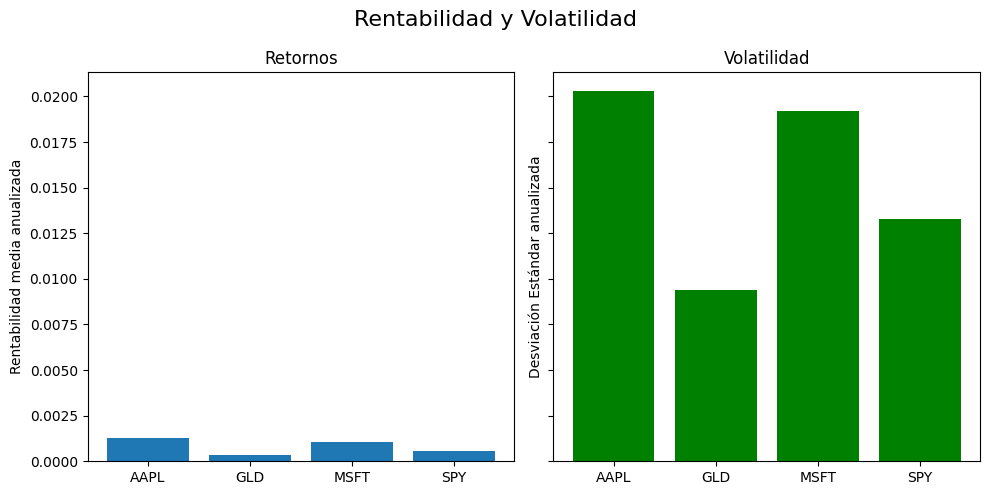

In [25]:
import matplotlib.pyplot as plt

# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = rentabilidad.mean()
stds = rentabilidad.std()

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey="row")

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(means.index, means.values)
axes[0].set_ylabel("Rentabilidad media anualizada")
axes[0].set_title("Retornos")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(stds.index, stds.values, color="green")
axes[1].set_ylabel("Desviación Estándar anualizada")
axes[1].set_title("Volatilidad")

# Añadir un título general a la figura
plt.suptitle("Rentabilidad y Volatilidad", fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Distribuciones de los retornos.

Ref.: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

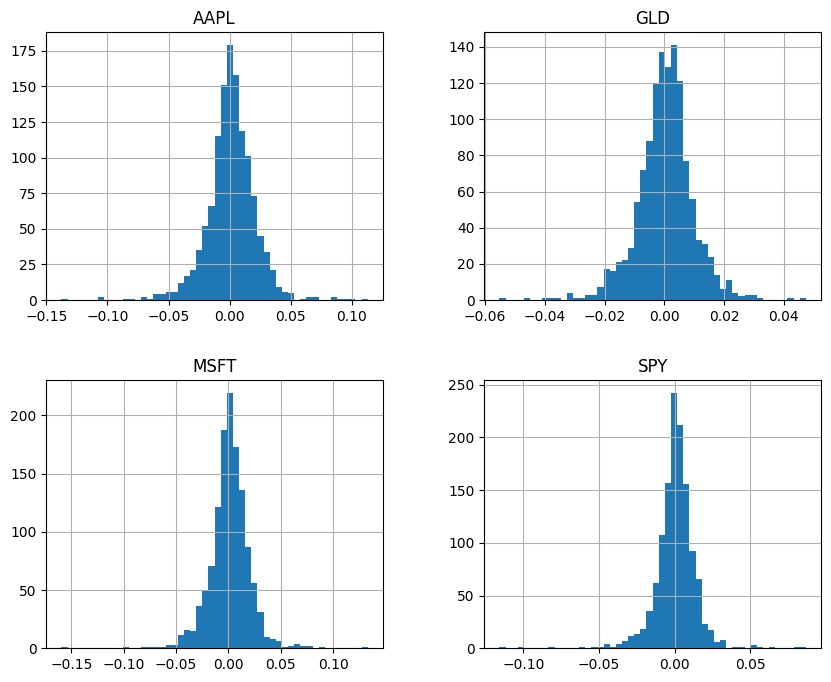

In [26]:
rentabilidad.hist(bins=50, figsize=(10, 8))
plt.show()

Pero... ¿siguen los retornos una distribución normal?

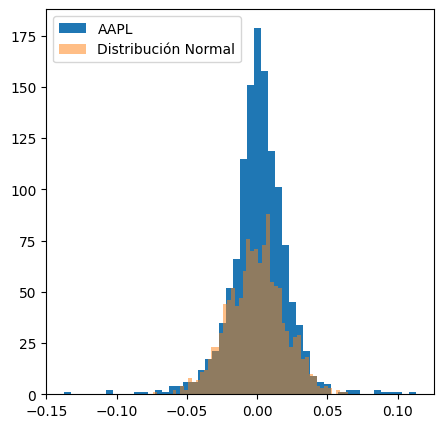

In [27]:
# Importamos el módulo de Numpy de generación de números aleatorios.
from numpy import random

# Creamos el generador de números aleatorios por defecto.
rng = random.default_rng(seed=42)

# Generamos la misma cantidad de números aleatorios que datos tenemos de retornos.
# Centrada en cero (parámetro "loc") y con la desviación estándar de los retornos de AAPL (parámetro "scale").
aleatorios_normal = rng.normal(loc=0, scale=rentabilidad.loc[:, "AAPL"].std(), size=len(rentabilidad))

# Graficamos el histograma de los retornos y los números aleatorios.
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.hist(rentabilidad.loc[:, "AAPL"], bins=50, label="AAPL")
plt.hist(aleatorios_normal, bins=50, alpha=0.5, label="Distribución Normal")
plt.legend()
plt.show()

Diagrama de caja.

Ref.: https://es.wikipedia.org/wiki/Diagrama_de_caja

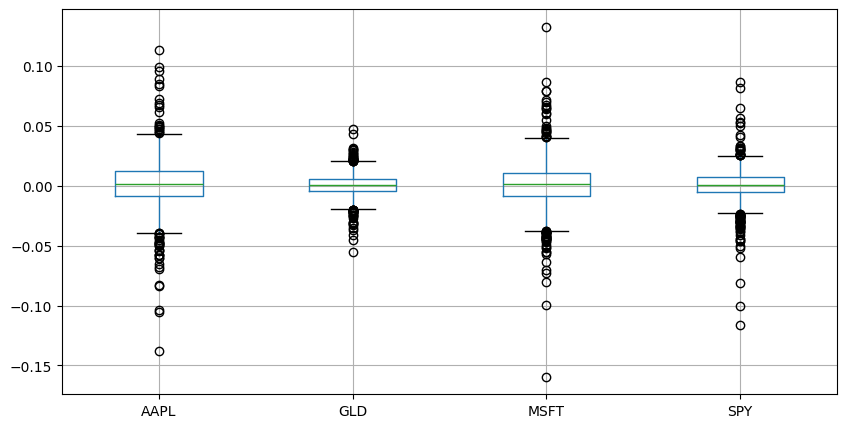

In [28]:
rentabilidad.boxplot(figsize=(10, 5))
plt.show()

Diagrama de violín.

Ref.: https://seaborn.pydata.org/generated/seaborn.violinplot.html

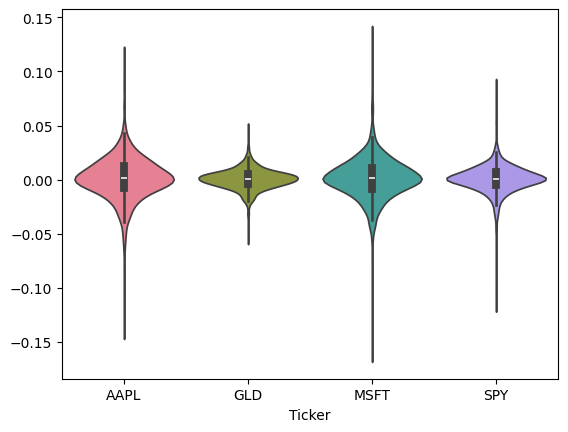

In [29]:
# Utilizando seaborn grafica un diagrama de violin de las rentabilidades
import seaborn as sns

sns.violinplot(data=rentabilidad, palette="husl", inner="box", legend="auto")
plt.show()

¿Cómo podríamos visualizar si los activos están correlacionados?

Una `scatter_matrix`nos presenta una combinación de ``histograma`` en la diagonal principal y un scatter plot con la ``covarianza`` en el resto de posiciones de la matriz.

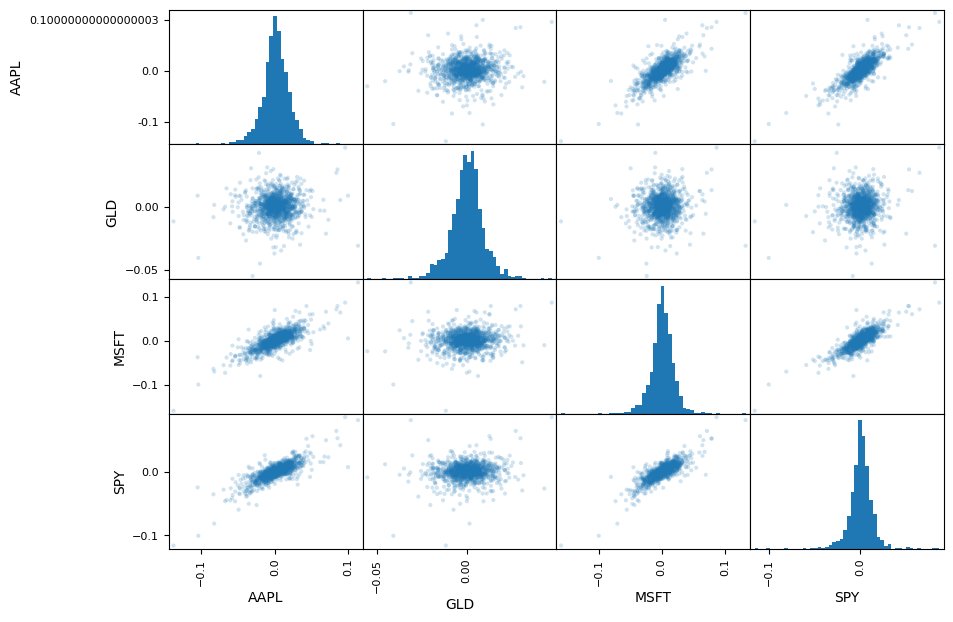

In [30]:
import pandas as pd

pd.plotting.scatter_matrix(rentabilidad, figsize=(10, 7), alpha=0.2, hist_kwds={"bins":50});

Visualizando la covarianza podemos ver si dos activos están correlacionados, pero no podemos ver la fuerza de la correlación. Para ello tenemos que utilizar la correlación y no la covarianza.

$$Var(x)=\frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})^2}$$

$$Std(x)=\sqrt{Var(x)}$$

$$Cov(x,y)=\frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})(y-\bar{y})} $$

$$Corr(x,y)=\frac{Cov(x,y)}{Std(x)Std(y)}$$

In [31]:
corr = rentabilidad.corr()
corr

Ticker,AAPL,GLD,MSFT,SPY
Ticker,,,,
AAPL,1.000000,0.085376,0.760846,0.805812
GLD,0.085376,1.000000,0.091757,0.107630
MSFT,0.760846,0.091757,1.000000,0.825804
SPY,0.805812,0.107630,0.825804,1.000000


Heatmap

Ref.: https://seaborn.pydata.org/generated/seaborn.heatmap.html

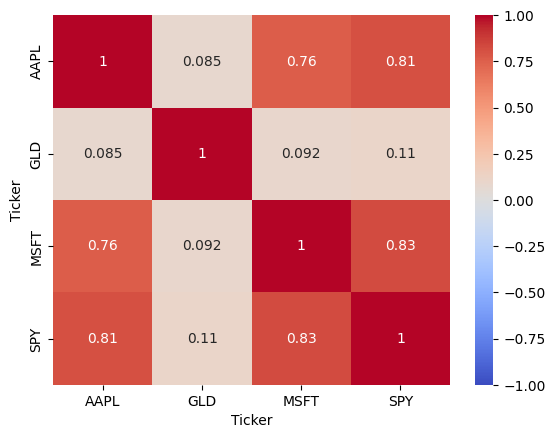

In [32]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

Una vez que hemos hecho el análisis básico de los activos que nos interesan, vamos a construir una cartera con ellos.

1. Establecer los pesos de cada activo en la cartera.
2. Calcular su rentabilidad y riesgo.

$$\mu(x)=R(x)@w$$

Donde:
* $\mu(x)$: es la rentabilidad diaria de mi cartera.
* $R(x)$: es la rentabilidad diaria de cada uno de los activos que componen la cartera.
* $w$: son los pesos asignados a cada uno de los activos que componen la cartera, sujetos a:
    * $\sum_{i=1}^{n}w_i=1$
    * $w_i>=0$

$$\sigma^2=w^T @ \Sigma @ w$$

Donde:
* $\sigma^2$: es la varianza de nuestra cartera.
* $w$: son los pesos asignados a cada uno de los activos que componen la cartera.
* $\Sigma$: es la matriz de varianzas-covarianzas entre los activos que componen la cartera.

También puede calcularse como:

$$\sigma^2=Var(\mu(x)) \implies \sigma=\sqrt{\sigma^2}=Std(\mu(x))$$

3. Comparar mi cartera con el benchmark (S&P 500).

In [33]:
# Establecer los pesos de cada activo: ["AAPL", "GLD", "MSFT"].
w = [0.30, 0.40, 0.30]

# Rentabilidad de mi cartera (r).
mu = rentabilidad.loc[:, ["AAPL", "GLD", "MSFT"]] @ w

# Riesgo de mi cartera (sigma).
sigma = mu.std()

# Mostramos resultados.
print(f"Rentabilidad anualizada de mi cartera: {mu.mean() * 252:.2f}")
print(f"Rentabilidad anualizada S&P 500: {rentabilidad.loc[:, 'SPY'].mean() * 252:.2f}")
print("----------------")
print(f"Riesgo anualizado de mi cartera: {sigma * np.sqrt(252):.2f}")
print(f"Riesgo anualizado S&P 500: {rentabilidad.loc[:, 'SPY'].std() * np.sqrt(252):.2f}")

Rentabilidad anualizada de mi cartera: 0.22
Rentabilidad anualizada S&P 500: 0.15
----------------
Riesgo anualizado de mi cartera: 0.19
Riesgo anualizado S&P 500: 0.21


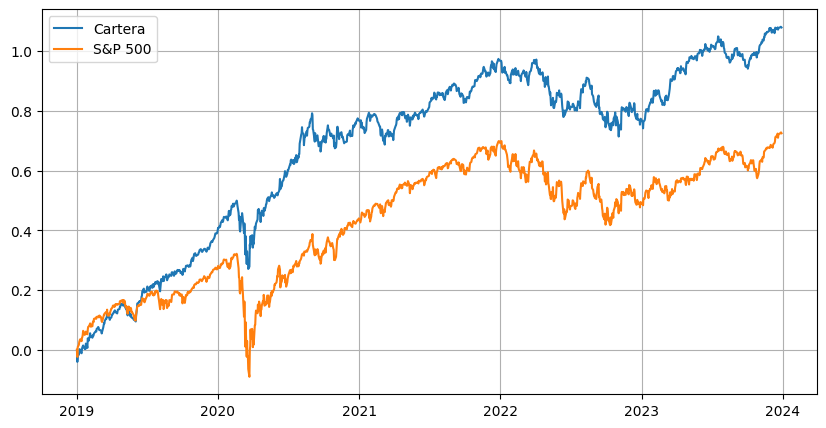

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(mu.cumsum(), label="Cartera")
plt.plot(rentabilidad.loc[:, "SPY"].cumsum(), label="S&P 500")
plt.grid(True)
plt.legend()
plt.show()